In [79]:
%matplotlib inline
%pip install scipy
%pip install scikit-learn

import piplite
await piplite.install('scikit-learn')
import pandas as pd
import numpy as np

Dataset = pd.read_csv('diabetes.csv')

Dataset
# Dataset содержит 9 колонок: Pregnancies (Беременности), Glucose (Глюкоза), BloodPressure (Кровяное давление), SkinThickness (Толщина кожи), 
# Insulin (Инсулин), BMI (Индекс массы тела), DiabetesPedigreeFunction (Родословная диабета), Age (Возраст), 
# Outcome (Эта колонка отвечает за то подтвердился ли диагноз или нет). 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.linear_model import LinearRegression
# Создали Pipeline. В узком смысле пайплайн – это модуль sklearn.pipeline, который позволяет автоматизировать предварительные преобразования данных перед обучением модели. 
# Добавили в него SimpleImputer. С помощью этого класса мы можем заменить значения NaN(отсутствующие значения) в наборе данных указанным заполнителем. 
# И добавили StandardScaler, который необходим для стандартизации значений данных в стандартный формат.

# Пайплайн
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaller', StandardScaler())
])

data = Dataset.drop('Outcome', axis = 1)
outcome = Dataset.Outcome

data_prepared = pipeline.fit_transform(data)

In [81]:
# Разделяем данные для обучения и теста

from sklearn.model_selection import train_test_split 
data_train, data_test, outcome_train, outcome_test = train_test_split(data_prepared, outcome, test_size = 0.20)

In [82]:
# Линейная регрессия
model = LinearRegression().fit(data_prepared,outcome)

some_data = data.iloc[:5]
some_output = outcome.iloc[:5]
data_prepared_some = pipeline.transform(some_data)

# Обучили модель с помощью алгоритма «Линейной регрессии». Сравнили первые 5 объектов. Вывели прогнозы и метки для них. 
print("Линейная регрессия. Прогнозы:", model.predict(data_prepared_some))
print("Линейная регрессия. Метки:",list(some_output))
# Если округлять полученные значения, то можно сделать вывод, что они совпадают с метками. 

Линейная регрессия. Прогнозы: [ 0.65175729  0.00573265  0.73642449 -0.0219232   0.83318937]
Линейная регрессия. Метки: [1, 0, 1, 0, 1]


In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data_predictions = model.predict(data_prepared)
linear_mse = mean_squared_error(outcome, data_predictions)
lin_rmse = np.sqrt(linear_mse)
print("Среднеквадратическое отклонение. Линейная регрессия:",lin_rmse)

Среднеквадратическое отклонение. Линейная регрессия: 0.39785855691820504


In [84]:
model.fit(data_train, outcome_train)
y_pred = model.predict(data_test)

In [85]:
from sklearn.metrics import classification_report, confusion_matrix 
# Матрица ошибок – это показатель успешности классификации, где классов два или более. 
# Это таблица с 4 различными комбинациями сочетаний прогнозируемых и фактических значений.
# В таблице содержится информация сколько раз система приняла верное и сколько раз неверное решение по документам заданного класса. А именно:
# TP — истино-положительное решение;
# TN — истино-отрицательное решение;
# FP — ложно-положительное решение;
# FN — ложно-отрицательное решение
print(confusion_matrix(outcome_test,y_pred.round()))

# Точность системы (precision) в пределах класса – это доля документов действительно принадлежащих данному классу 
# относительно всех документов которые система отнесла к этому классу. 
# Полнота системы (recall) – это доля найденных классфикатором документов принадлежащих классу относительно всех документов этого класса в тестовой выборке.

# F-мера: Понятно что чем выше точность и полнота, тем лучше. 
# Но в реальной жизни максимальная точность и полнота не достижимы одновременно и приходится искать некий баланс.
# Поэтому, хотелось бы иметь некую метрику которая объединяла бы в себе информацию о точности и полноте нашего алгоритма. 
# Именно такой метрикой является F-мера.

# Accuracy — это показатель, который описывает общую точность предсказания модели по всем классам. 
# Это особенно полезно, когда каждый класс одинаково важен. 
# Он рассчитывается как отношение количества правильных прогнозов к их общему количеству.
print(classification_report(outcome_test,y_pred.round()))

[[83  8]
 [28 35]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        91
           1       0.81      0.56      0.66        63

    accuracy                           0.77       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



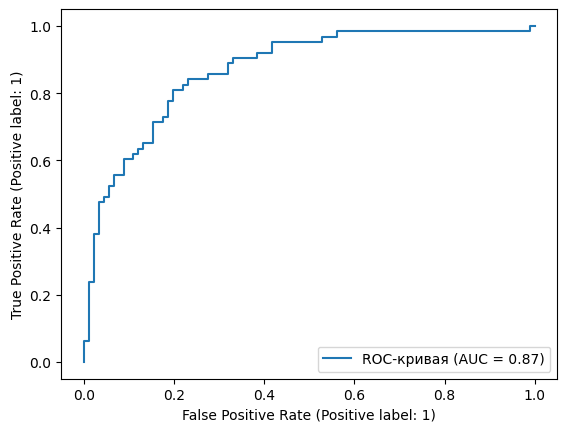

In [86]:
from sklearn.metrics import RocCurveDisplay
# ROC-кривая — график, позволяющий оценить качество бинарной классификации, 
# отображает соотношение между долей объектов от общего количества носителей признака, 
# верно классифицированных как несущие признак   долей объектов от общего количества объектов,
# не несущих признака, ошибочно классифицированных как несущие признак
# при варьировании порога решающего правила.
RocCurveDisplay.from_predictions(outcome_test, y_pred, name="ROC-кривая")
# Чем больше площадь под кривой (AUC), тем лучше классификация. 
# Если судить по этому признаку, то в данной лабораторной работе лучше всего подходит метод линейной регрессии. 

In [87]:
linearRegressor = LinearRegression()
linearRegressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [88]:
from sklearn.model_selection import GridSearchCV
# Гиперпараметры в линейной регрессии
param_grid = [
    {
        'copy_X':[False], 'fit_intercept':[False],
    }, 
    {
        'positive':[True],'n_jobs':[3,10,30]
    }
]
grid_search = GridSearchCV(linearRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,outcome)
grid_search.best_params_

{'n_jobs': 3, 'positive': True}

In [89]:
import pickle
# Сохранили модель в формате pickle
file = open('models/linear_regressor.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

In [90]:
# Дерево решений
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(data_prepared,outcome)

data_predictions = tree_regressor.predict(data_prepared)
linear_mse = mean_squared_error(outcome, data_predictions)
lin_rmse = np.sqrt(linear_mse)
print("Среднеквадратическое отклонение. Дерево решений:",lin_rmse)

Среднеквадратическое отклонение. Дерево решений: 0.0


[[68 23]
 [22 41]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.75        91
           1       0.64      0.65      0.65        63

    accuracy                           0.71       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.71      0.71      0.71       154



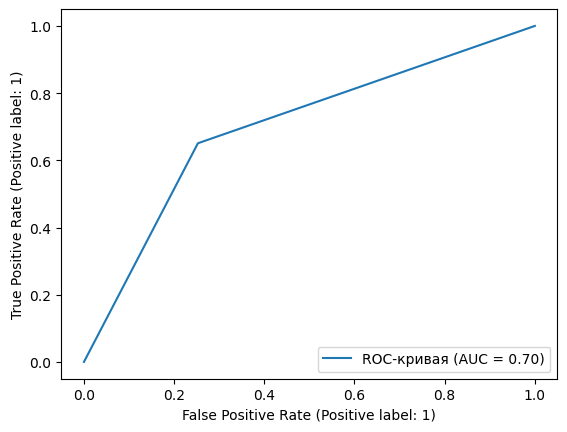

In [91]:
tree_regressor.fit(data_train, outcome_train)
y_pred = tree_regressor.predict(data_test)
# Матрица ошибок в дереве решений.
print(confusion_matrix(outcome_test,y_pred))

print(classification_report(outcome_test,y_pred))

# Точность системы, полнота системы и F-мера в дереве решений.
RocCurveDisplay.from_predictions(outcome_test, y_pred, name="ROC-кривая")

In [92]:
tree_regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [93]:
# Гиперпараметры в дереве решений.
param_grid = [
    {
        'max_features':[1,5,10], 'min_samples_leaf':[3,7,2]
    }, 
]
grid_search = GridSearchCV(tree_regressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,outcome)
grid_search.best_params_

{'max_features': 5, 'min_samples_leaf': 7}

In [94]:
import pickle
# Сохранили модель в формате pickle

file = open('models/tree_regressor.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

In [95]:
# Метод опорных векторов
from sklearn.svm import SVC 
svclassifier = SVC(kernel='linear') 
svclassifier.fit(data_train, outcome_train)
y_pred = svclassifier.predict(data_test)

In [96]:
from sklearn.metrics import classification_report, confusion_matrix 
# Матрица ошибок в методе опорных векторов.
print(confusion_matrix(outcome_test,y_pred))

# Точность системы, полнота системы и F-мера в методе опорных векторов.
print(classification_report(outcome_test,y_pred))

[[83  8]
 [28 35]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        91
           1       0.81      0.56      0.66        63

    accuracy                           0.77       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



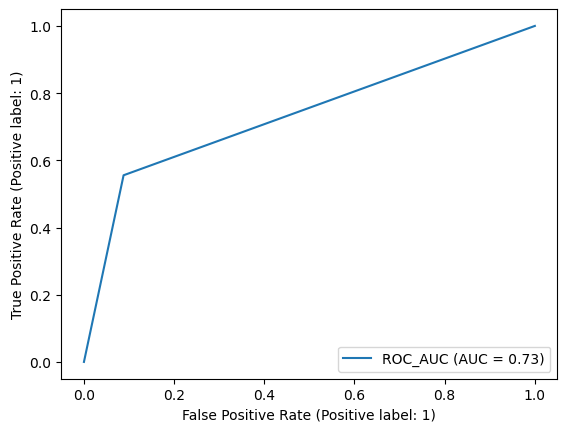

In [97]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(outcome_test,y_pred, name="ROC_AUC")

In [98]:
svclassifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [99]:
from sklearn.model_selection import GridSearchCV
# Гиперпараметры в методе опорных векторов
param_grid = [
    {
        'C':[0.2], 'break_ties':[True], 'probability': [False]
    }, 
    {
        'C':[1.0], 'break_ties':[False], 'probability': [True]
    }
]
grid_search = GridSearchCV(svclassifier,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,outcome)
grid_search.best_params_

{'C': 1.0, 'break_ties': False, 'probability': True}

In [100]:
import pickle
# Сохранили модель в формате pickle

file = open('models/svc.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

In [101]:
# Метод k-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier 
knnclassifier = KNeighborsClassifier(n_neighbors=5) 
knnclassifier.fit(data_train, outcome_train)
y_pred = knnclassifier.predict(data_test)

In [102]:
from sklearn.metrics import classification_report, confusion_matrix 
# Матрица ошибок в методе k-ближайших соседей.
print(confusion_matrix(outcome_test,y_pred)) 

# Точность системы, полнота системы и F-мера в методе k-ближайших соседей.
print(classification_report(outcome_test,y_pred))

[[84  7]
 [30 33]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        91
           1       0.82      0.52      0.64        63

    accuracy                           0.76       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.77      0.76      0.75       154



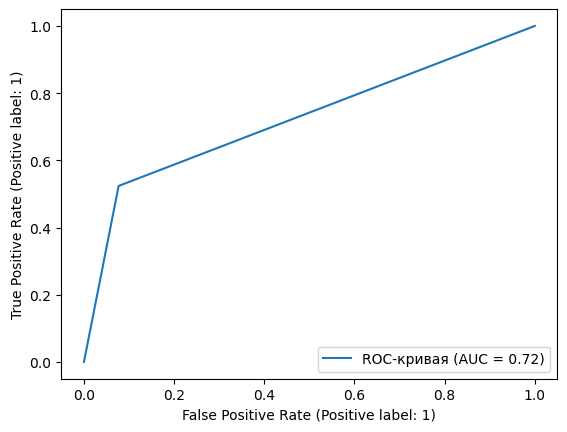

In [103]:
RocCurveDisplay.from_predictions(outcome_test, y_pred, name="ROC-кривая")

In [104]:
knnclassifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [105]:
from sklearn.model_selection import GridSearchCV
# Гиперпараметры в методе k-ближайших соседей
param_grid = [
    {
        'n_neighbors':[5,7,15], 'weights':['distance']
    }, 
    {
        'n_neighbors':[1,3,20], 'weights':['uniform']
    }
]
grid_search = GridSearchCV(knnclassifier,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,outcome)
grid_search.best_params_

{'n_neighbors': 15, 'weights': 'distance'}

In [106]:
import pickle
# Сохранили модель в формате pickle

file = open('models/knn.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

In [112]:
# Случайный лес

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Оценки:",scores)
    print("Среднее:", scores.mean())
    print("Стандартное отклонение:",scores.std())

forest_model = RandomForestRegressor()
forest_model.fit(data_prepared,outcome)
forest_rmse = mean_squared_error(outcome, forest_model.predict(data_prepared))
print(np.sqrt(forest_rmse))
forest_rmse_scores = cross_val_score(forest_model, data_prepared,outcome,scoring='neg_mean_squared_error')
display_scores(np.sqrt(-forest_rmse_scores))

0.15097167918741142
Оценки: [0.41913485 0.44880071 0.39005994 0.35050664 0.41824251]
Среднее: 0.4053489293371615
Стандартное отклонение: 0.03312335706218993


In [114]:
from sklearn.metrics import classification_report, confusion_matrix 
forest_model.fit(data_train, outcome_train)
y_pred = forest_model.predict(data_test)

# Матрица ошибок в методе "Случайный лес".
print(confusion_matrix(outcome_test,y_pred.round()))

# Точность системы, полнота системы и F-мера в методе "Случайный лес".
print(classification_report(outcome_test,y_pred.round()))

[[79 12]
 [23 40]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        91
           1       0.77      0.63      0.70        63

    accuracy                           0.77       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.77      0.77      0.77       154



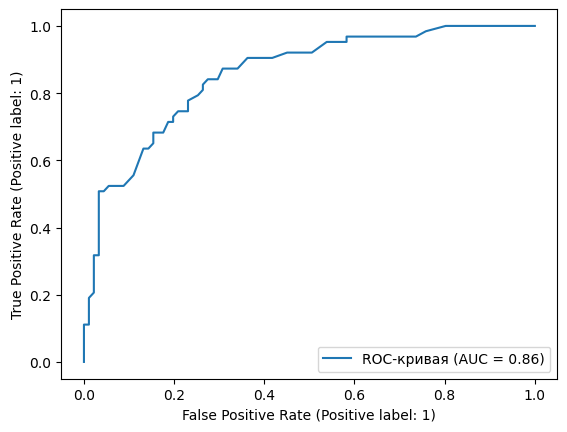

In [115]:
RocCurveDisplay.from_predictions(outcome_test, y_pred, name="ROC-кривая")

In [116]:
# Гиперпараметры случайного леса

from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'n_estimators':[3,10,30], 'max_features':[2,4,7]
    }, 
    {
        'bootstrap':[False],'n_estimators':[3,10,30],'max_features':[2,3,4]   
    }
]

regressor = RandomForestRegressor()
grid_search = GridSearchCV(regressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,outcome)
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [117]:
import pickle
# Сохранили модель в формате pickle

file = open('models/random_forest.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

In [118]:
from sklearn.naive_bayes import GaussianNB

# Наивный байесовский классификатор
gnb_model = GaussianNB()
gnb_model.fit(data_prepared,outcome)
gnb_rmse = mean_squared_error(outcome, gnb_model.predict(data_prepared))
print(np.sqrt(gnb_rmse))
gnb_rmse_scores = cross_val_score(gnb_model, data_prepared,outcome,scoring='neg_mean_squared_error')
display_scores(np.sqrt(-gnb_rmse_scores))

0.48680506023116343
Оценки: [0.49674264 0.52223297 0.50323628 0.46442036 0.50487816]
Среднее: 0.4983020824505434
Стандартное отклонение: 0.018924487568488572


In [119]:
from sklearn.metrics import classification_report, confusion_matrix 

gnb_model.fit(data_train, outcome_train)
y_pred = svclassifier.predict(data_test)

# Матрица ошибок в наивном байесовском классификаторе.
print(confusion_matrix(outcome_test,y_pred)) 

# Точность системы, полнота системы и F-мера в наивном байесовском классификаторе.
print(classification_report(outcome_test,y_pred))

[[83  8]
 [28 35]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        91
           1       0.81      0.56      0.66        63

    accuracy                           0.77       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



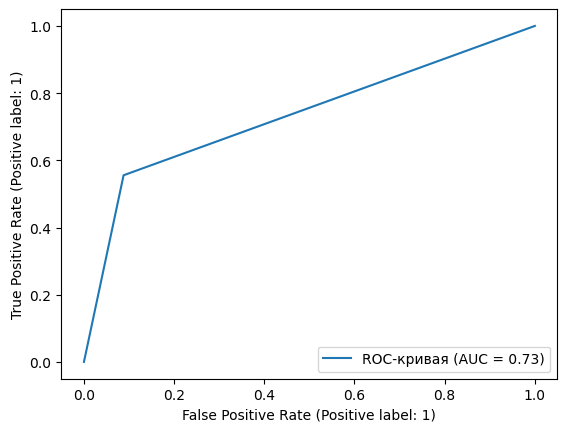

In [120]:
RocCurveDisplay.from_predictions(outcome_test, y_pred, name="ROC-кривая")

In [121]:
gnb_model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [122]:
# Гиперпараметры в наивном байесовском классификаторе.
param_grid = [
    {
        'priors':[None], 'var_smoothing':[0.000000001, 0.0000001, 0.001]
    }, 
]

grid_search = GridSearchCV(gnb_model,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,outcome)
grid_search.best_params_

{'priors': None, 'var_smoothing': 1e-09}

In [123]:
import pickle
# Сохранили модель в формате pickle

file = open('models/naive_bayes.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()